Dataset : https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

# ***Import Libraries***

In [ ]:
!pip install wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ***Read Datasets & Display its info***

In [ ]:
##Reading the datasets
anime_data = pd.read_csv("/content/anime.csv")
rating_data = pd.read_csv("/content/rating.csv")

In [ ]:
##Display first 5 rows in anime dataset
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
##Display first 5 rows in user rating dataset
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
##Print shape of dataset with rows, columns and information - anime data
print("Shape of the data is (row, column):" + str(anime_data.shape))
print(anime_data.info())
print(anime_data.describe())

Shape of the data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.01391

In [ ]:
##Print shape of dataset with rows, columns and information - user rating
print("Shape of the data is (row, column):" + str(rating_data.shape))
print(rating_data.info())
print(rating_data.describe())

Shape of the data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None
            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


In [ ]:
#Merging our data based on anime_id from both datasets then we will rename the columns later
anime_fulldata = pd.merge(anime_data, rating_data, on='anime_id', suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns = {'name' : 'anime_title', 'rating_user' : 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# ***Data Analysis & Exploration***

Text(0, 0.5, 'User Rating count')

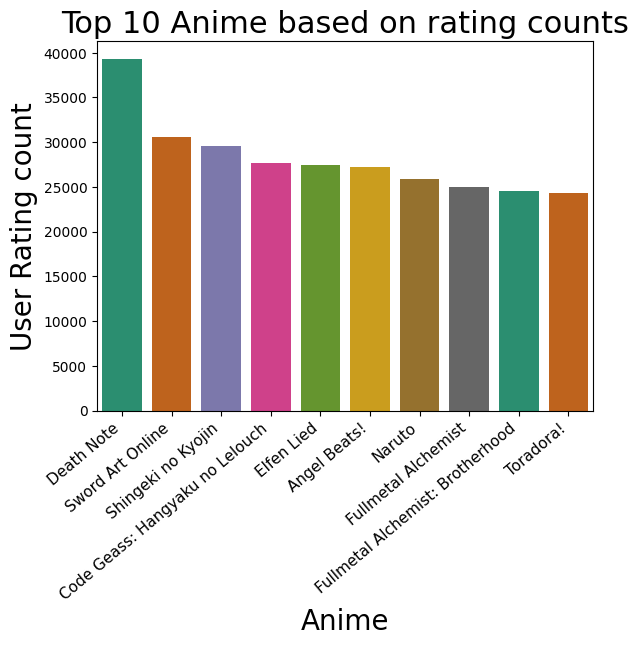

In [ ]:
##Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.groupby(by = ['anime_title'])['user_rating'].count().reset_index())

##Plotting bar plot for *top 10 anime per rating*
top10_animerating = anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating', ascending = False).head(10)
ax = sns.barplot(x="anime_title", y="user_rating", data = top10_animerating, palette ="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 11, rotation = 40, ha = "right")
ax.set_title('Top 10 Anime based on rating counts', fontsize = 22)
ax.set_xlabel('Anime', fontsize = 20)
ax.set_ylabel('User Rating count', fontsize = 20)

Text(0, 0.5, 'Community Size')

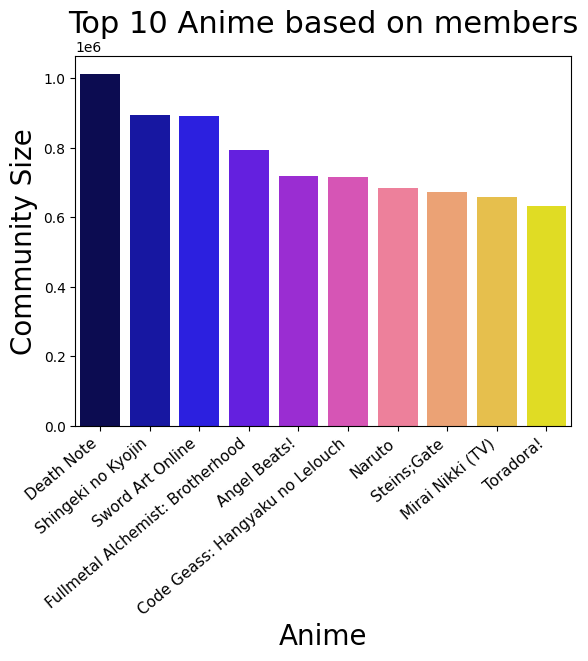

In [ ]:
##Creating a copy and dropping the duplicates
duplicate_anime = anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset = "anime_title", keep = 'first', inplace = True)

##Plotting bar plot for *top 10 anime based on Community size*
top10_animemembers = duplicate_anime[['anime_title', 'members']].sort_values(by = 'members', ascending = False).head(10)
ax=sns.barplot(x = "anime_title", y = "members", data = top10_animemembers, palette = "gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members', fontsize = 22)
ax.set_xlabel('Anime', fontsize = 20)
ax.set_ylabel('Community Size', fontsize = 20)

Text(0.5, 1.0, 'Rating of users')

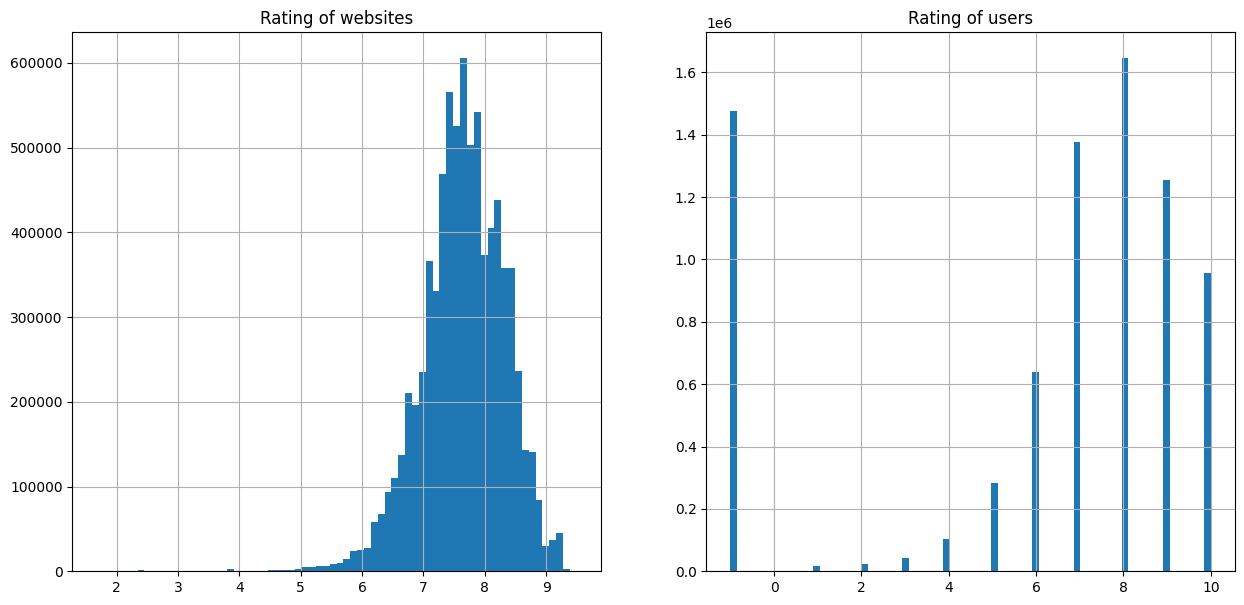

In [ ]:
##Distribution of ratings
plt.figure(figsize = (15, 7))
plt.subplot(1, 2, 1)
anime_fulldata['rating'].hist(bins = 70)
plt.title("Rating of websites")
plt.subplot(1, 2, 2)
anime_fulldata['user_rating'].hist(bins = 70)
plt.title("Rating of users")

***Conclusions:***

> *   Most of the ratings are spread between 6–10
*   The mode of the distribution is around 7.5–8.0
*   Both the distribution are left skewed
*   We have -1 rating as an outlier in rating of users which can be made into NaN

In [ ]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data = [go.Pie(labels = labels, values = values)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20,
                  marker = dict(colors = colors, line = dict(color = '#000000', width = 2)))
fig.update_layout(title = {'text' : "Medium of Streaming", 'y' : 0.9, 'x' : 0.5, 'xanchor' : 'center', 'yanchor' : 'top'})
fig.show()

***Conclusion:***

> *   67.9% of the anime’s were aired on TV followed by 13.4% through Movie
*   9.97% of anime’s are streamed as OVA which is greater than ONA(1.2%)

(-0.5, 1999.5, 799.5, -0.5)

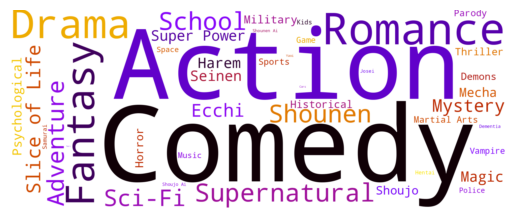

In [ ]:
nonull_anime = anime_fulldata.copy()
nonull_anime.dropna(inplace = True)

from collections import defaultdict
all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud
genres_cloud = WordCloud(width = 2000, height = 800, background_color = 'white', colormap = 'gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation = 'bilinear')
plt.axis('off')

# ***Data Preparation***

In [ ]:
##Replacing -1 with NaN in user_rating column
anime_feature = anime_fulldata.copy()

anime_feature["user_rating"].replace({-1 : np.nan}, inplace = True)
anime_feature.head()

##Dropping all the null values
anime_feature = anime_feature.dropna(axis = 0, how ='any')
anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [ ]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

In [ ]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

In [ ]:
anime_pivot = anime_feature.pivot_table(index = 'anime_title', columns = 'user_id', values = 'user_rating').fillna(0)
anime_pivot.head(10)

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy: Parody Mode,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Gift,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ***Recommendation Building Phase***

In [ ]:
from scipy.sparse import csr_matrix
##Creating a sparse matrix
anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors
#Fitting the model
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(anime_pivot.shape[0])
#print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0} : \n'.format(anime_pivot.index[query_index]))
    else:
        print('{0} : {1}, with distance of {2} : '.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Koutetsu Tenshi Kurumi 2 : 

1 : Koutetsu Tenshi Kurumi, with distance of 0.29614015710387476 : 
2 : Koutetsu Tenshi Kurumi Zero, with distance of 0.36330329625007707 : 
3 : Koutetsu Tenshi Kurumi Encore, with distance of 0.36739638915337847 : 
4 : Happy☆Lesson (TV), with distance of 0.7198256150614291 : 
5 : Hand Maid May, with distance of 0.7305132819418305 : 


In [ ]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#getting tfidf
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

#getting the indices of anime title
indices = pd.Series(anime_data.index, index = anime_data['name']).drop_duplicates()

In [ ]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key = lambda x : x[1], reverse = True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1 : 11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name' : anime_data['name'].iloc[anime_indices].values, 'Rating': anime_data['rating'].iloc[anime_indices].values})

In [ ]:
give_rec("Naruto")

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21
